## Data overview

Train.csv contains 4 columns: Id,Title,Body,Tags.

Test.csv contains the same columns but without the Tags, which you are to predict.

Size of Train.csv - 6.75GB

Size of Test.csv - 2GB

Number of rows in Train.csv = 6034195

ID: Unique identity of each question asked.

Title: The heading or the brief description of the problem

Body: Body of the question.

Tags: The tags associated with the question.

Useful links:
https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/


## EDA

In [26]:
import pandas as pd
import numpy as np
import os
from datetime import datetime 
import datetime as dt
import sqlalchemy
from sqlalchemy import create_engine
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
#loading data
df = pd.read_csv("/Users/josslyngao/Downloads/Train.zip")
df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [10]:
print('Total Rows: {}\nTotal Columns: {}'.format(df.shape[0],df.shape[1]))
print('Columns: ',df.columns[0],df.columns[1],df.columns[2],df.columns[3])
print("Size of Train.zip in GB \'{}\'".format(os.path.getsize("/Users/josslyngao/Downloads/Train.zip")/10**9))

Total Rows: 6034195
Total Columns: 4
Columns:  Id Title Body Tags
Size of Train.zip in GB '2.347110159'


In [11]:
df = df.iloc[:10000, :]
print("Shape of Dataframe after subsetting: ", df.shape)

Shape of Dataframe after subsetting :  (10000, 4)


In [16]:
#check for and drop duplicates
df.duplicated(subset=None, keep="first")
df.drop_duplicates()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
5,6,setting proxy in active directory environment,<p>I am using a machine on which active direct...,proxy active-directory jmeter
6,7,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot
7,8,How to fetch an XML feed using asp.net,<p>I've decided to convert a Windows Phone 7 a...,c# asp.net windows-phone-7
8,9,.NET library for generating javascript?,<p>Do you know of a .NET library for generatin...,.net javascript code-generation
9,10,"SQL Server : procedure call, inline concatenat...",<p>I'm using SQL Server 2008 R2 and was wonder...,sql variables parameters procedure calls


In [17]:
# Counting no of tags per question
df["tag_count"] = df["Tags"].apply(lambda x : len(x.split()))

In [18]:
#frequency of tag count
df["tag_count"].value_counts()

3    2919
2    2612
4    1969
1    1296
5    1200
Name: tag_count, dtype: int64

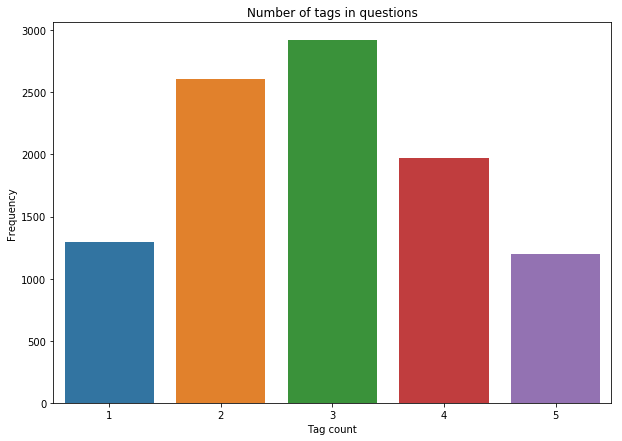

In [23]:
fig = plt.figure(figsize=[10,7])
sns.countplot(df['tag_count'])
plt.title('Number of tags in questions')
plt.ylabel('Frequency')
plt.xlabel('Tag count')
plt.show()

In [28]:
#total number of unique tags
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_uni = vectorizer.fit_transform(df['Tags'])

In [29]:
print("Number of unique tags:", tag_bow.shape[1])

Number of unique tags: 6124
